In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier


from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv("processed.csv")
pd.set_option("display.max_columns", None)
df


,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,8.3,44.0,71.0,22.0,1007.7,1007.1,8.0,0.0,0,0
1,0.0,10.0,44.0,44.0,25.0,1010.6,1007.8,7.0,1.0,0,0
2,0.0,4.4,46.0,38.0,30.0,1007.6,1008.7,8.0,2.0,0,0
3,0.0,8.9,24.0,45.0,16.0,1017.6,1012.8,0.0,5.0,0,0
4,1.0,3.0,41.0,82.0,33.0,1010.8,1006.0,7.0,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145455,0.0,7.8,31.0,51.0,24.0,1024.6,1020.3,1.0,1.0,0,0
145456,0.0,13.5,22.0,56.0,21.0,1023.5,1019.1,8.0,5.0,0,0
145457,0.0,11.0,37.0,53.0,24.0,1021.0,1016.8,8.0,1.0,0,0
145458,0.0,13.2,28.0,51.0,24.0,1019.4,1016.5,3.0,2.0,0,0


In [3]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the XGBoost classifier
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8440464732572529

Confusion Matrix:
[[21443  1229]
 [ 3308  3112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22672
           1       0.72      0.48      0.58      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.72      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [4]:
model = XGBClassifier()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean accuracy
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.85077769 0.8433445  0.84532096 0.84604477 0.84552915]
Mean Accuracy: 0.8462034164640961


In [5]:
model = XGBClassifier()

# Use cross_val_predict to get predicted probabilities for each instance
y_scores = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')

y_scores_positive = y_scores[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_train, y_scores_positive)

# Print the ROC-AUC score
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8609283063915696


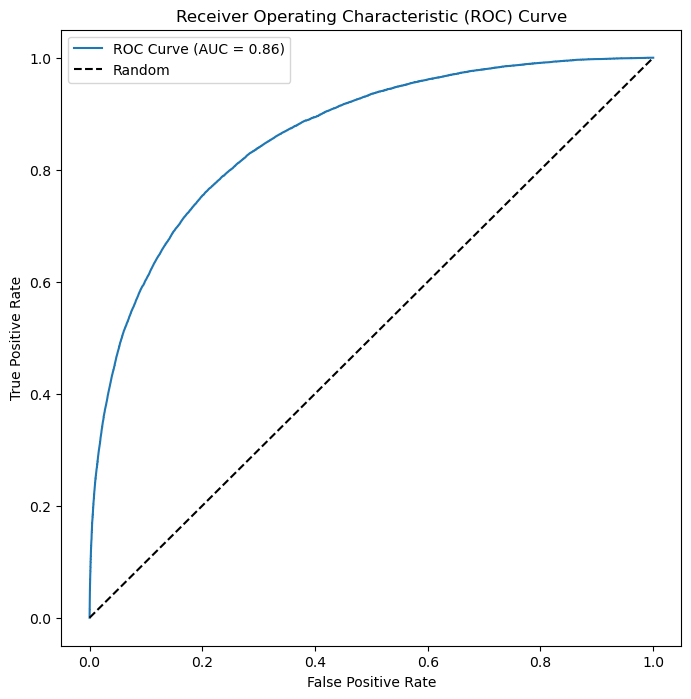

In [6]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_positive)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [7]:
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)
